In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import erfc
%matplotlib inline

pi = np.pi

plt.rcParams['font.size'] = 40
plt.rcParams['figure.figsize'] = (40, 10)
plt.rcParams['lines.linewidth'] = 2.0

# Aufgabe 13: Zeitdiskrete Zufallsprozesse

Gegeben sei ein zeitdiskreter, stationärer, weißer und gaußverteilter Zufallsprozess $W(n)$ mit der Varianz $\sigma_W^2 = 1$. Aus $W(n)$ wird wie folgt ein weiterer Zufallsprozess $R(n)$ generiert.

![Blockdiagramm](figures/A13/System_Blockdiagramm.png)

## 13.1:
Geben sie die Wahrscheinlichkeitsdichte $p_W(w)$ an.

Laut Aufgabenstellung ist der Zufallsprozess $W(n)$ gaußverteilt. Deshalb müssen nur Mittelwert und Varianz bestimmt werden. Die Varianz ist schon gegeben: $\sigma_W^2 = 1$.   

Da der Prozess laut Aufgabenstellung stationär ist, muss der Mittelwert zeitlich konstant sein.
Wäre nun $\mathrm{E}\left[W(n)\right] = \mu_{W(n)} = \mu_W \neq 0$, ergäbe der spektrale Anteil des Mittelwerts
$\mathcal{F}_d\left\{ \mu_W \right\} = \mu_W {\cdot} 2 \pi \delta(\omega)$.   
Dies würde aber der Vorraussetzung widersprechen, dass der Prozess weiß ist. Es muss also gelten: $\mu_W \overset{!}{=} 0$.

Damit folgt für die Wahrscheinlichkeitsverteilungsdichte

\begin{align}
    p_W(w) = \mathcal{N}\left(w; \mu_W, \sigma_W^2 \right) = \mathcal{N}\left(w; 0, 1 \right) = \frac{1}{\sqrt{2 \pi}} \exp \left( -\frac{w^2}{2}  \right).
\end{align}

#### Graph der Verteilunsgdichte $p_W(w)$:

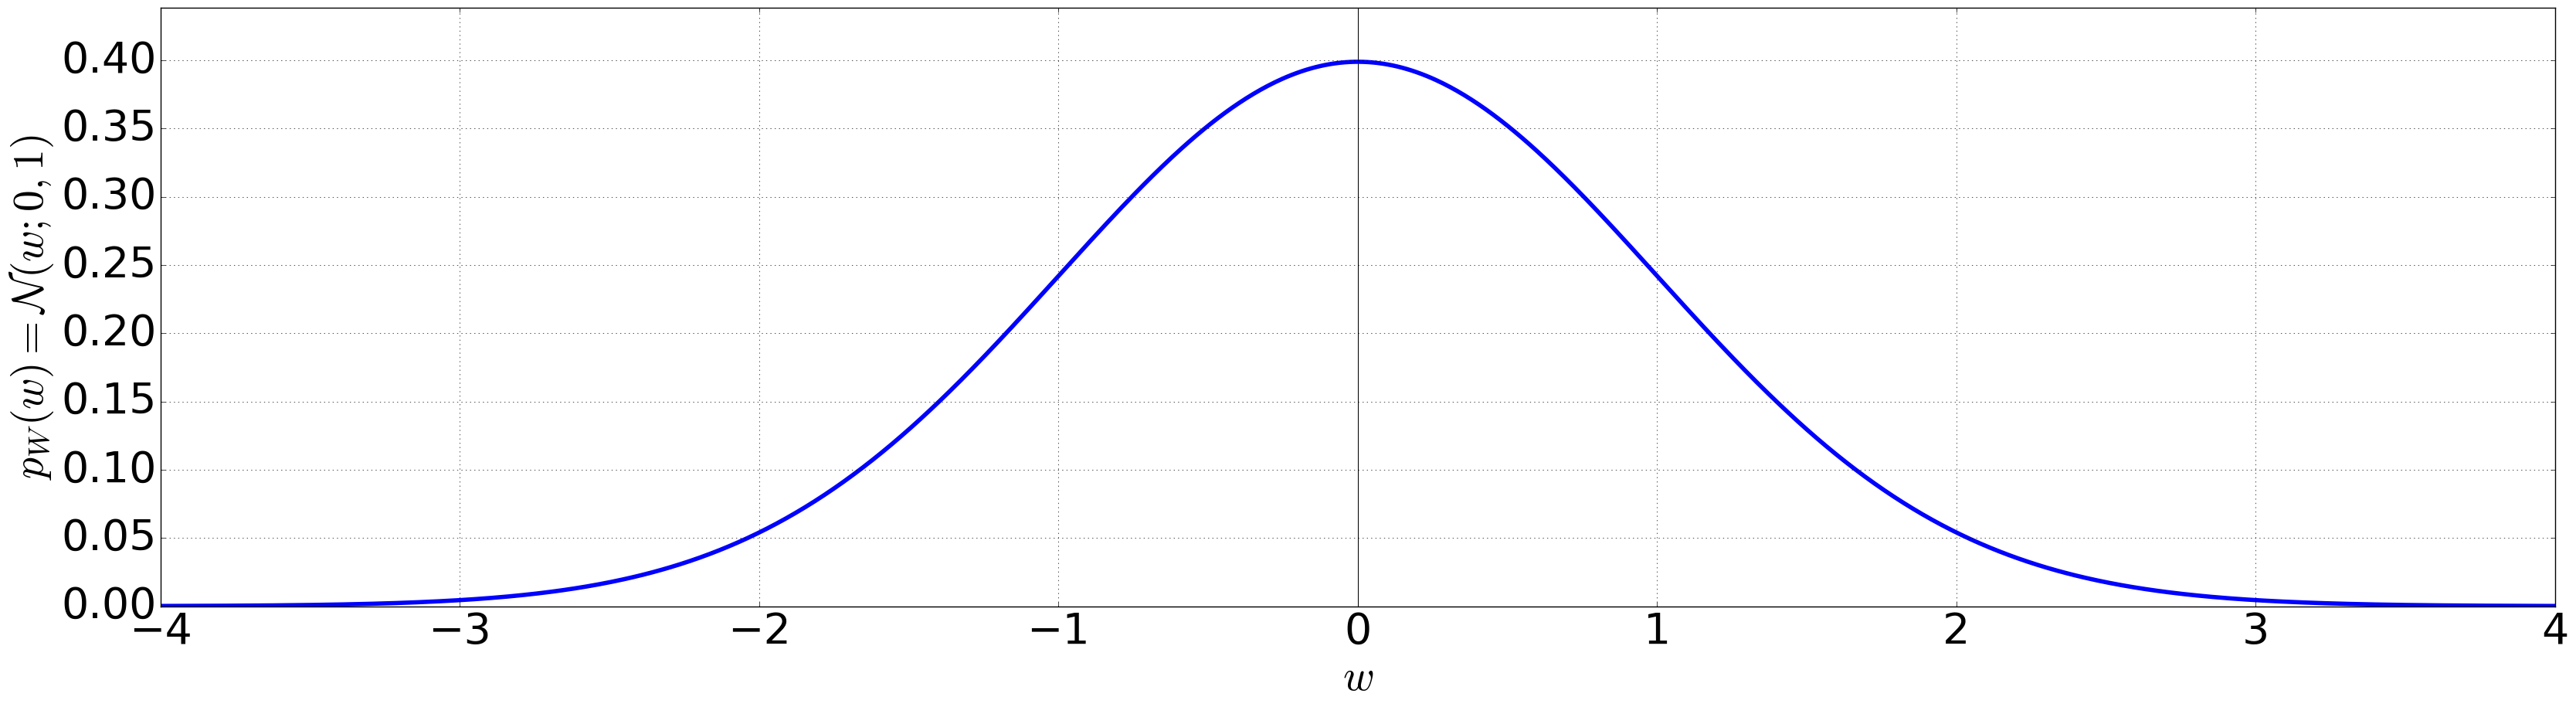

In [2]:
mu_W, var_W = 0, 1
sigma_W = np.sqrt(var_W)
w = mu_W + np.linspace(-4*sigma_W, 4*sigma_W, 1000)
p_W = norm(loc=mu_W, scale=sigma_W)

plt.axvline(lw=0.75, c='k')
plt.plot(w, p_W.pdf(w), lw=4)

plt.axhline(lw=0.75, c='k')
plt.xlim((min(w), max(w)))
plt.ylim((0, 1.1/np.sqrt(2*pi)))
plt.xlabel(r'$w$')
plt.ylabel(r'$p_W(w) = \mathcal{N}(w; 0, 1)$')
plt.grid(True)

## 13.2:
Geben sie die Wahrscheinlichkeitsdichte $p_R(r)$ an.

Aus dem Blockschaltbild resultert:

\begin{align}
    R(n) = 2\cdot\left(W(n) + W(n-3)\right)
\end{align}

Dabei sind folgende Punkte zu beachten:
 - Die Verzögerung hat bei einem stationären Zufallsprozess keinen Einfluss auf die Verteilung
 - Da der Zufallsprozess $W$ weiß ist, sind $W(n)$ und $W(n-3)$ unkorreliert und damit wegen der Gaußverteiltheit auch statistisch unabhängig.
 - Eine Summe gußverteilter Zufallsvariablen ist ebenfalls gaußverteilt.

Da $R(n)$ auch gaußverteilt ist, reicht es wieder, Mittelwert und Varianz zu bestimmen.

#### Mittelwert:

\begin{align}
    \mu_R = \mathrm{E}\left[ R(n) \right] &= \mathrm{E}\left[ 2\cdot\left(W(n) + W(n-3)\right) \right] \\
    &= 2\cdot\left( \mathrm{E}\left[W(n)\right] + \mathrm{E}\left[W(n-3)\right] \right) \\
    &= 2\cdot\left( \mu_W + \mu_W \right) \\
    &= 4\mu_W = 0.
\end{align}

#### Varianz:
Da $W(n)$ und $W(n-3)$ unkorreliert sind, können ihre Varianzen einzeln skaliert und addiert werden. Dies lässt sich auch herleiten. Dabei kann direkt die Mittelwertfreiheit ausgenutzt werden, indem nur die Leistung berechnet wird:

\begin{align}
    \sigma_R^2 = \mathrm{E}\left[ R(n)^2 \right] &= \mathrm{E}\left[ \left(2\cdot\left(W(n) + W(n-3)\right)\right)^2 \right] \\
    &= 4 \mathrm{E}\left[ W(n)^2 + 2{\cdot}W(n){\cdot}W(n-3) + W(n-3)^2 \right] \\
    &= 4{\cdot}\mathrm{E}\left[ W(n)^2 \right] + 8{\cdot}\underbrace{\mathrm{E}\left[W(n){\cdot}W(n-3)\right]}_{\text{unkorreliert}} + 4{\cdot}\mathrm{E}\left[ W(n-3)^2 \right] \\
    &= 4{\cdot}\sigma_W^2 + 8{\cdot}\underbrace{\mathrm{E}\left[ W(n)\right]{\cdot}\mathrm{E}\left[ W(n-3)\right]}_{=0\cdot0} + 4{\cdot}\sigma_W^2 \\
    &= 8{\cdot}\sigma_W^2 = 8.
\end{align}

Damit resultiert für die Wahrscheinlichkeitsverteilungsdichte:

\begin{align}
    p_R(r) = \mathcal{N}\left(r; 0, 8 \right) = \frac{1}{\sqrt{16 \pi}} \exp \left( -\frac{r^2}{16} \right).    
\end{align}

#### Graph der Verteilungsdichte $p_R(r)$:

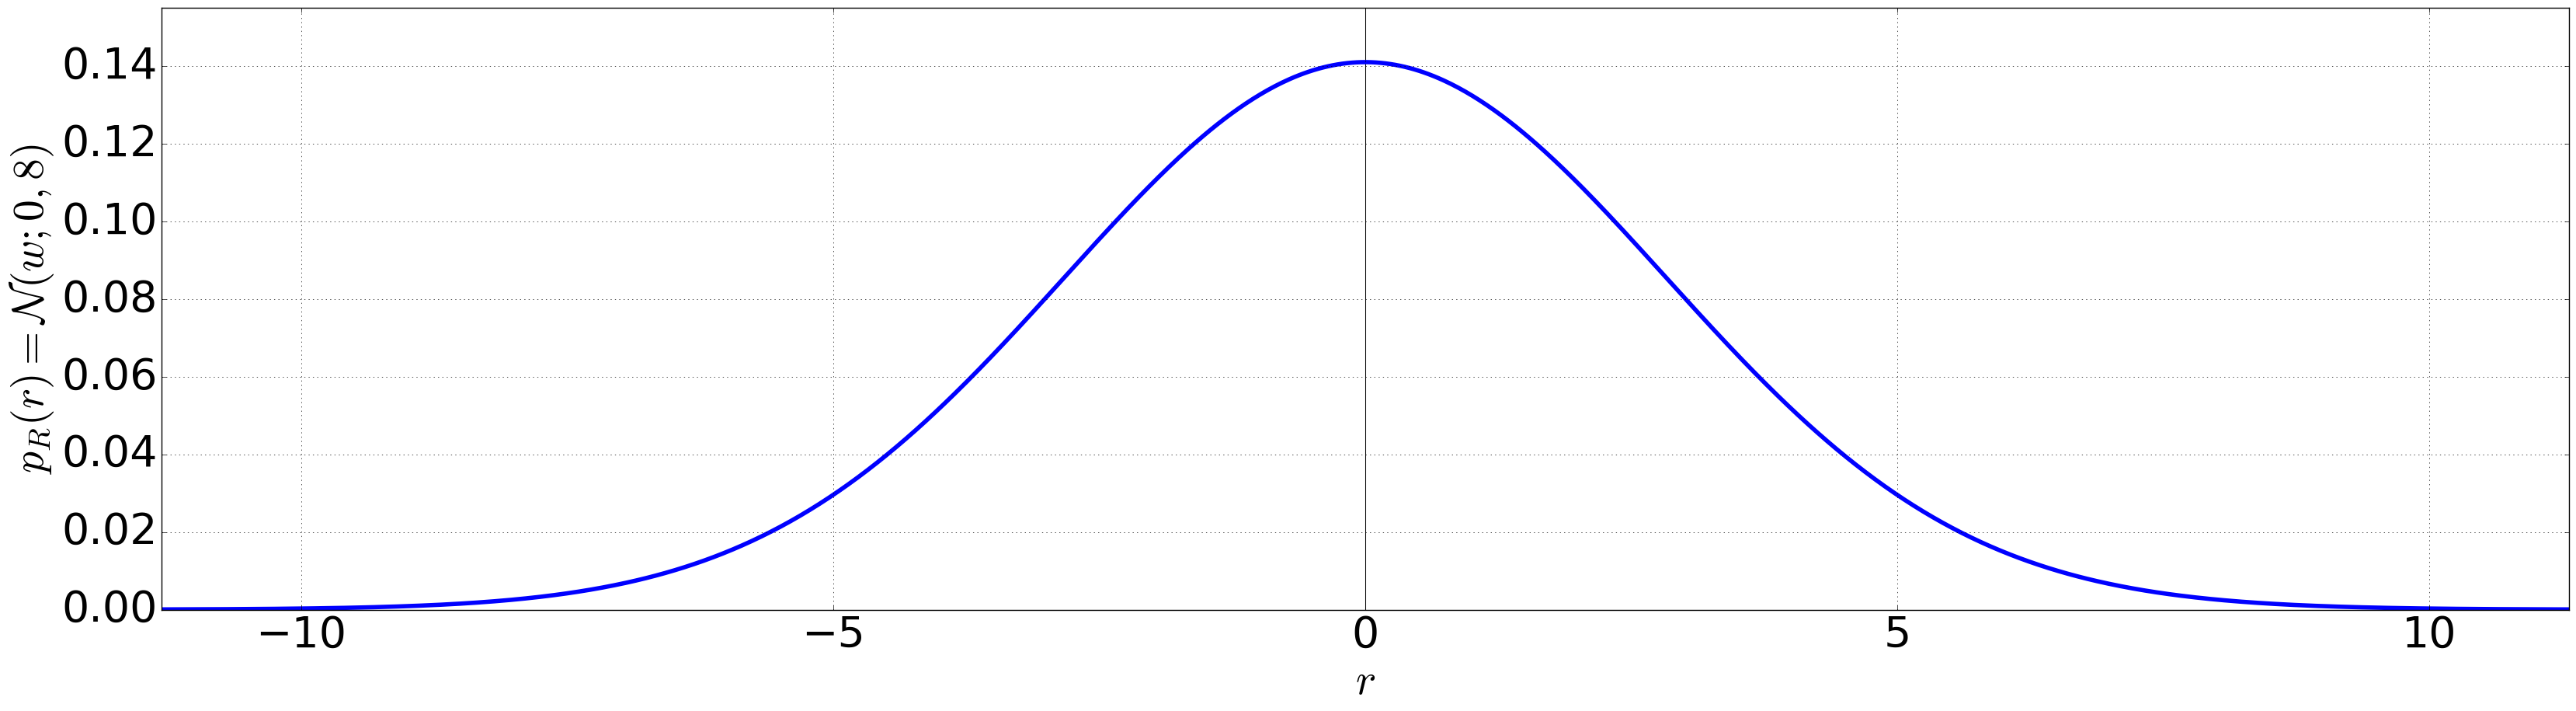

In [3]:
mu_R, var_R = 4*mu_W, 8*var_W
sigma_R = np.sqrt(var_R)
r = mu_W + np.linspace(-4*sigma_R, 4*sigma_R, 1000)
p_R = norm(loc=mu_R, scale=sigma_R)

plt.axvline(lw=0.75, c='k')
plt.plot(r, p_R.pdf(r), lw=4)

plt.axhline(lw=0.75, c='k')
plt.xlim((min(r), max(r)))
plt.ylim((0, 1.1/np.sqrt(2*pi*8)))
plt.xlabel(r'$r$')
plt.ylabel(r'$p_R(r) = \mathcal{N}(w; 0, 8)$')
plt.grid(True)

## 13.3:
Geben sie die Autokorrelationsfunktion (AKF) $\varphi_{WW}(\lambda)$ **und** das Leistungsdichtespektrum (LDS) $\Phi_{WW}\left(\mathrm{e}^{j \omega T}\right)$ von $W(n)$ an.

Da $W$ ein zeitdiskreter, stationärer, weißer Zufallsprozess ist, lässt sich die AKF direkt angeben:

\begin{align}
    \varphi_{WW}(\lambda) = \sigma_W^2\ \gamma(\lambda)
\end{align}

Durch Zeitdiskrete Fouriertransformation resultiert das LDS

\begin{align}
    \Phi_{WW}(\mathrm{e}^{j \omega T}) = \sigma_W^2
\end{align}


#### Graph der AKF $\varphi_{WW}(\lambda)$:

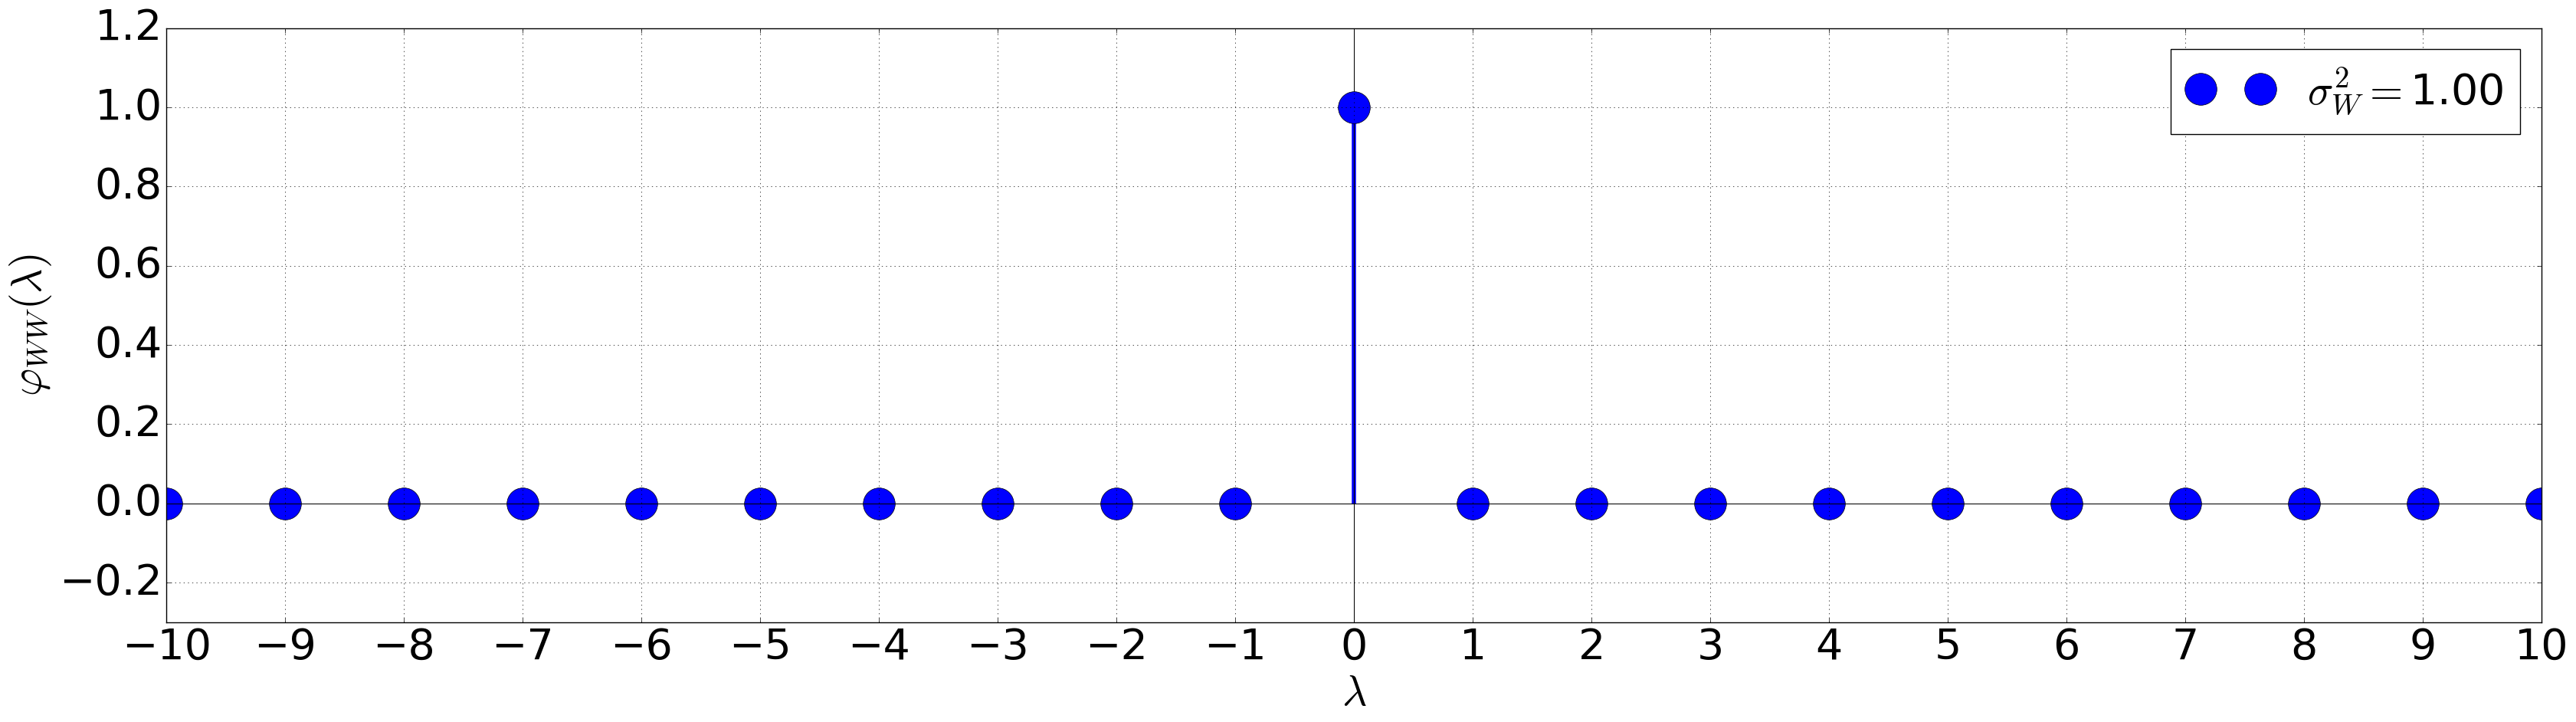

In [4]:
lambda_shift = np.arange(-10, 11)
phi_WW = (lambda_shift == 0)*var_W

plt.axvline(lw=0.75, c='k')
plt.plot(lambda_shift, phi_WW, 'bo', ms=30,
          label=r'$\sigma_W^2=$'+'{:2.2f}'.format(var_W))
plt.vlines(lambda_shift, 0, phi_WW, 'b',lw=4)
plt.axhline(lw=0.75, c='k')

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\varphi_{WW}(\lambda)$')
plt.xticks(lambda_shift)
plt.xlim((-10, 10))
plt.ylim((-0.3, 1.2*var_W))
plt.legend(fontsize=40)
plt.grid(True);

#### Graph des LDS $\Phi_{WW}(\mathrm{e}^{j \omega T})$:

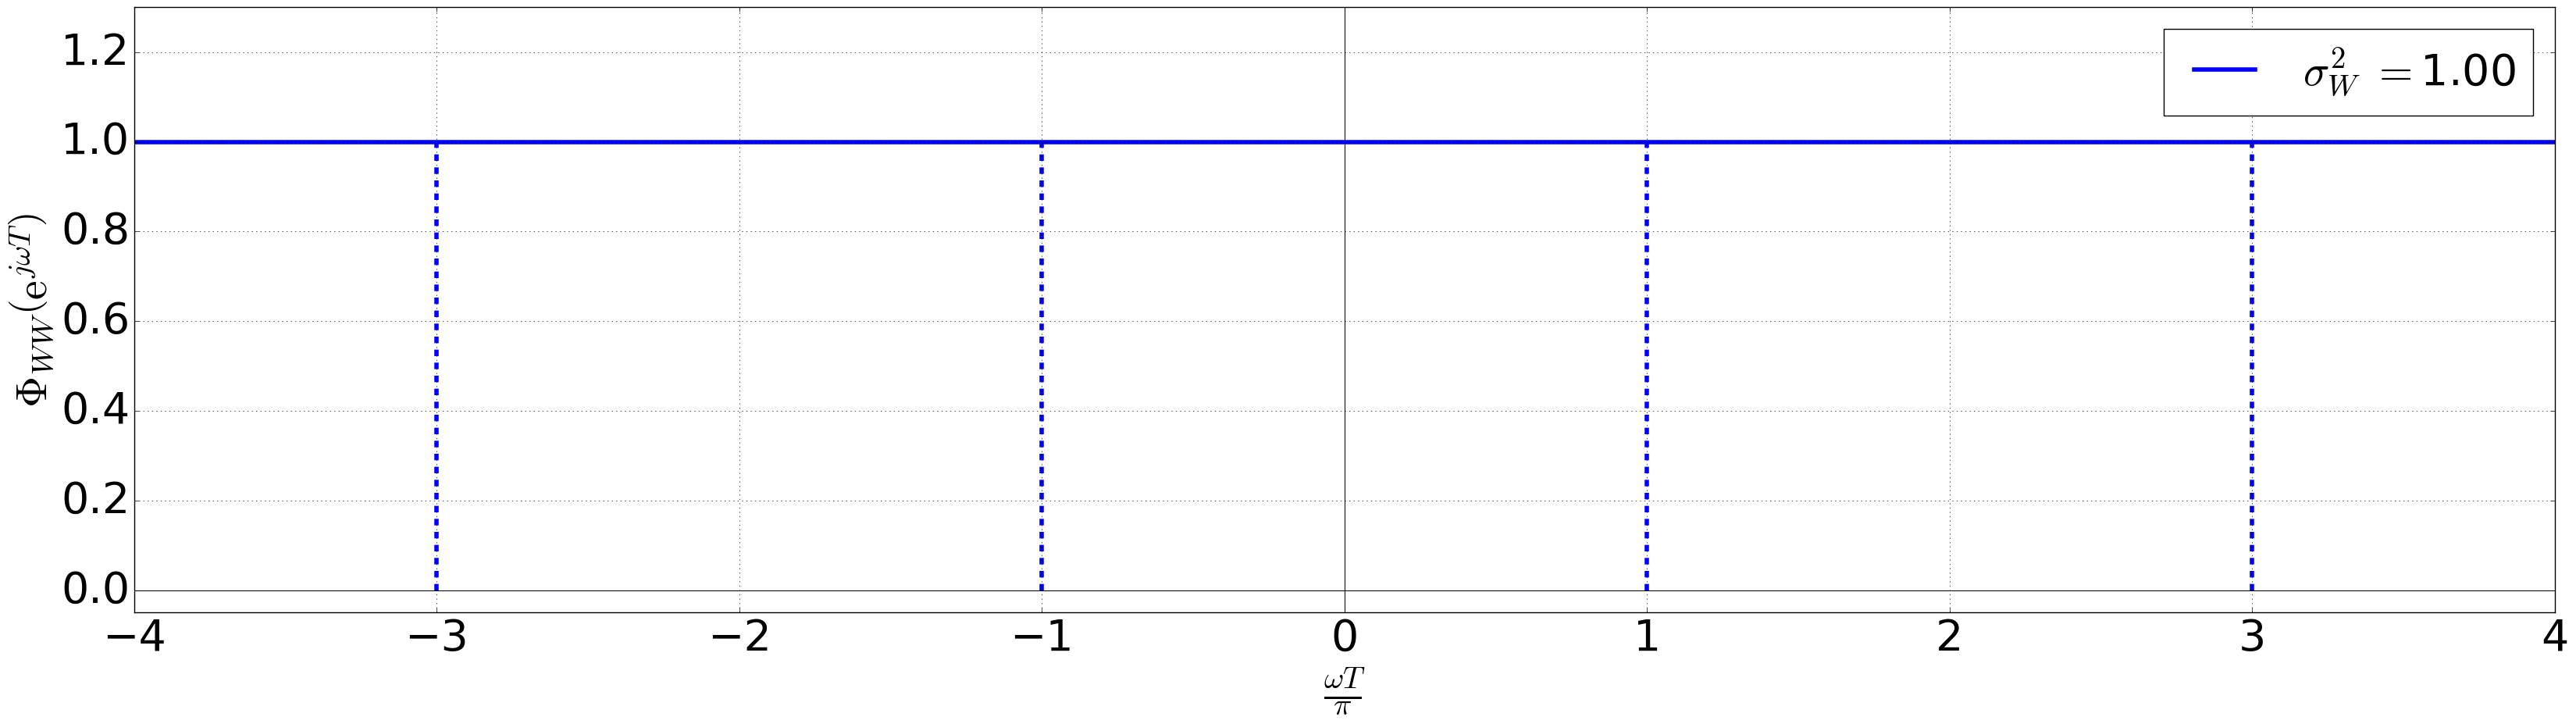

In [5]:
omega_T_per_pi = np.linspace(-4, 4, 1000)
Phi_WW = var_W*np.ones_like(omega_T_per_pi)
omega_bounds = np.arange(-5, 5, 2)

plt.axvline(lw=0.75, c='k')
plt.plot(omega_T_per_pi, Phi_WW, lw=4, 
         label=r'$\sigma_W^2 \ =$'+'{:2.2f}'.format(var_W))
plt.vlines(omega_bounds, 0 , var_W, 'b', 'dashed', lw=4)
plt.axhline(lw=0.75, c='k')

plt.xlabel(r'$\frac{\omega T}{\pi}$')
plt.ylabel(r'$\Phi_{WW}\left( \mathrm{e}^{j\omega T} \right)$')
plt.xlim((-4, 4))
plt.ylim((-0.05, 1.3*var_W))
plt.legend(fontsize=40)
plt.grid(True);

## 13.4:
Bestimmen **und** skizzieren Sie die AKF $\varphi_{RR}(\lambda)$ von $R(n)$.

Das gegebene System lässt sich durch eine Impulsantwort beschreiben:

\begin{align}
    R(n) &= 2\cdot\left( W(n) + W(n-3) \right) = W(n) \ast \underbrace{2 \cdot \left(\gamma(n) + \gamma(n-3)\right)}_{=h(n)} = W(n) \ast h(n) \\
    \Rightarrow h(n) &= 2 \cdot \left(\gamma(n) + \gamma(n-3)\right)
\end{align}

Die AKF $\varphi_{RR}(\lambda)$ resultiert aus der Wiener-Lee-Beziehung:

\begin{align}
    \varphi_RR(\lambda) &= \varphi_{WW}(\lambda) \ast \varphi^E_{hh}(\lambda) \\
    &= \varphi_{WW}(\lambda) \ast h(-\lambda) \ast h(\lambda) \\
    &= \varphi_{WW}(\lambda) \ast \left( 2 \cdot \left(\ \gamma(-\lambda) + \gamma(-\lambda-3)\ \right)\ \right) \ast \left( 2 \cdot \left(\ \gamma(\lambda) + \gamma(\lambda-3)\ \right)\ \right) \\
    &= \varphi_{WW}(\lambda) \ast \left( 2 \cdot \left(\ \gamma(\lambda) + \gamma(\lambda+3)\ \right)\ \right) \ast \left( 2 \cdot \left(\ \gamma(\lambda) + \gamma(\lambda-3)\ \right)\ \right) \\
    &= \varphi_{WW}(\lambda) \ast \left( 4 \cdot \left(\ \gamma(\lambda) + \gamma(\lambda+3) + \gamma(\lambda-3) + \gamma(\lambda)\ \right)\ \right) \\
    &= \sigma_W^2 \gamma(\lambda) \ast \left( 4 \cdot \left(\ 2\cdot \gamma(\lambda) + \gamma(\lambda+3) + \gamma(\lambda-3)\ \right)\ \right) \\
    &= 8\sigma_W^2 \left(\ \gamma(\lambda) + \frac{1}{2}\gamma(\lambda+3) + \frac{1}{2}\gamma(\lambda-3)\ \right)
\end{align}

#### Graph der AKF $\varphi_{RR}(\lambda)$:

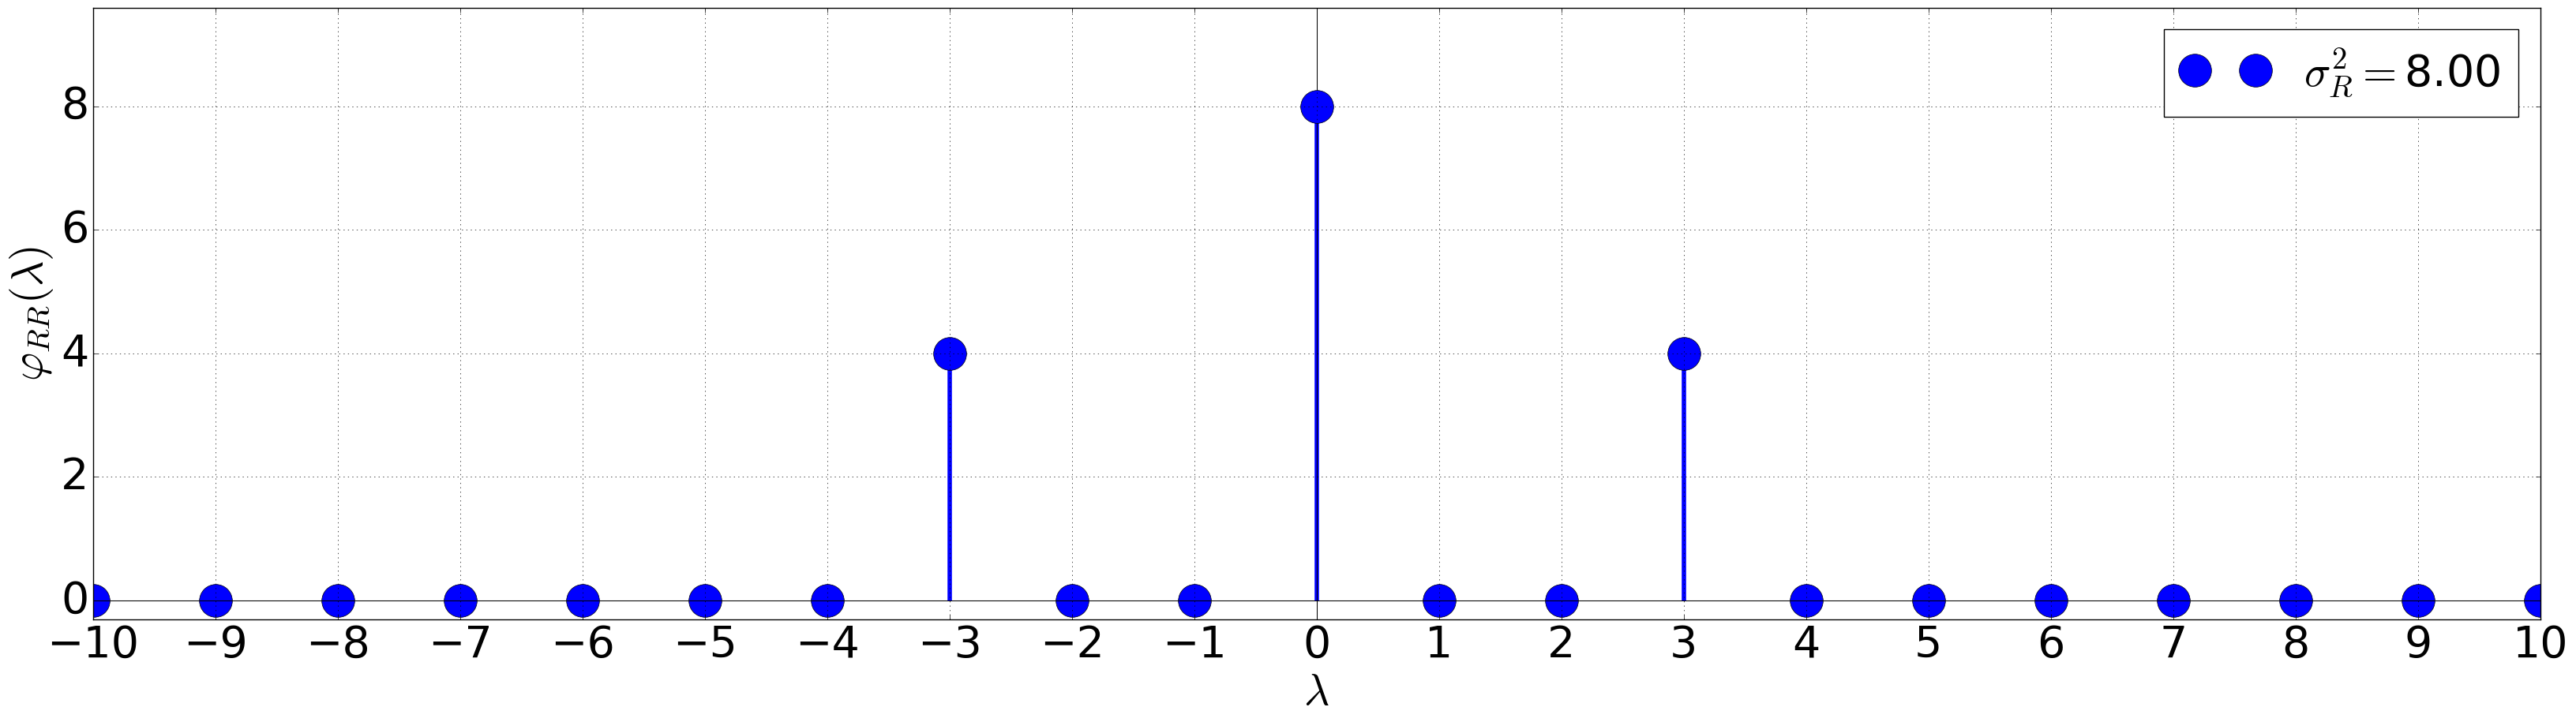

In [6]:
phi_RR = var_R*((lambda_shift == 0) + 1/2*(lambda_shift == 3) + 1/2*(lambda_shift == -3))

plt.axvline(lw=0.75, c='k')
plt.plot(lambda_shift, phi_RR, 'bo', ms=30,
          label=r'$\sigma_R^2=$'+'{:2.2f}'.format(var_R))
plt.vlines(lambda_shift, 0, phi_RR, 'b',lw=4)
plt.axhline(lw=0.75, c='k')

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\varphi_{RR}(\lambda)$')
plt.xticks(lambda_shift)
plt.xlim((-10, 10))
plt.ylim((-0.3, 1.2*var_R))
plt.legend(fontsize=40)
plt.grid(True);

Das LDS lässt sich durch Fouriertransformation mit dem Transformationspaar $\mathcal{F}_d\left\{ \gamma(\lambda) \right\} = \mathrm{e}^{-j \omega T}$ bestimmen:

\begin{align}
   \Phi_{RR}\left(\mathrm{e}^{j \omega T}\right) &=   \mathcal{F}_d\left\{\varphi_RR(\lambda) \right\} \\
   &= 8\sigma_W^2 \mathcal{F}_d\left\{ \gamma(\lambda) + \frac{1}{2}\gamma(\lambda+3) + \frac{1}{2}\gamma(\lambda-3)\ \right\} \\
   &= 8\sigma_W^2 \left(1 + \frac{1}{2}\mathrm{e}^{-j \omega 3 T} + \frac{1}{2}\mathrm{e}^{+j \omega 3 T} \right) \\
   &= 8\sigma_W^2 \left(1 + \cos\left(\omega 3 T\right) \right)
\end{align}

#### Graph des LDS $\Phi_{WW}(\mathrm{e}^{j \omega T})$:

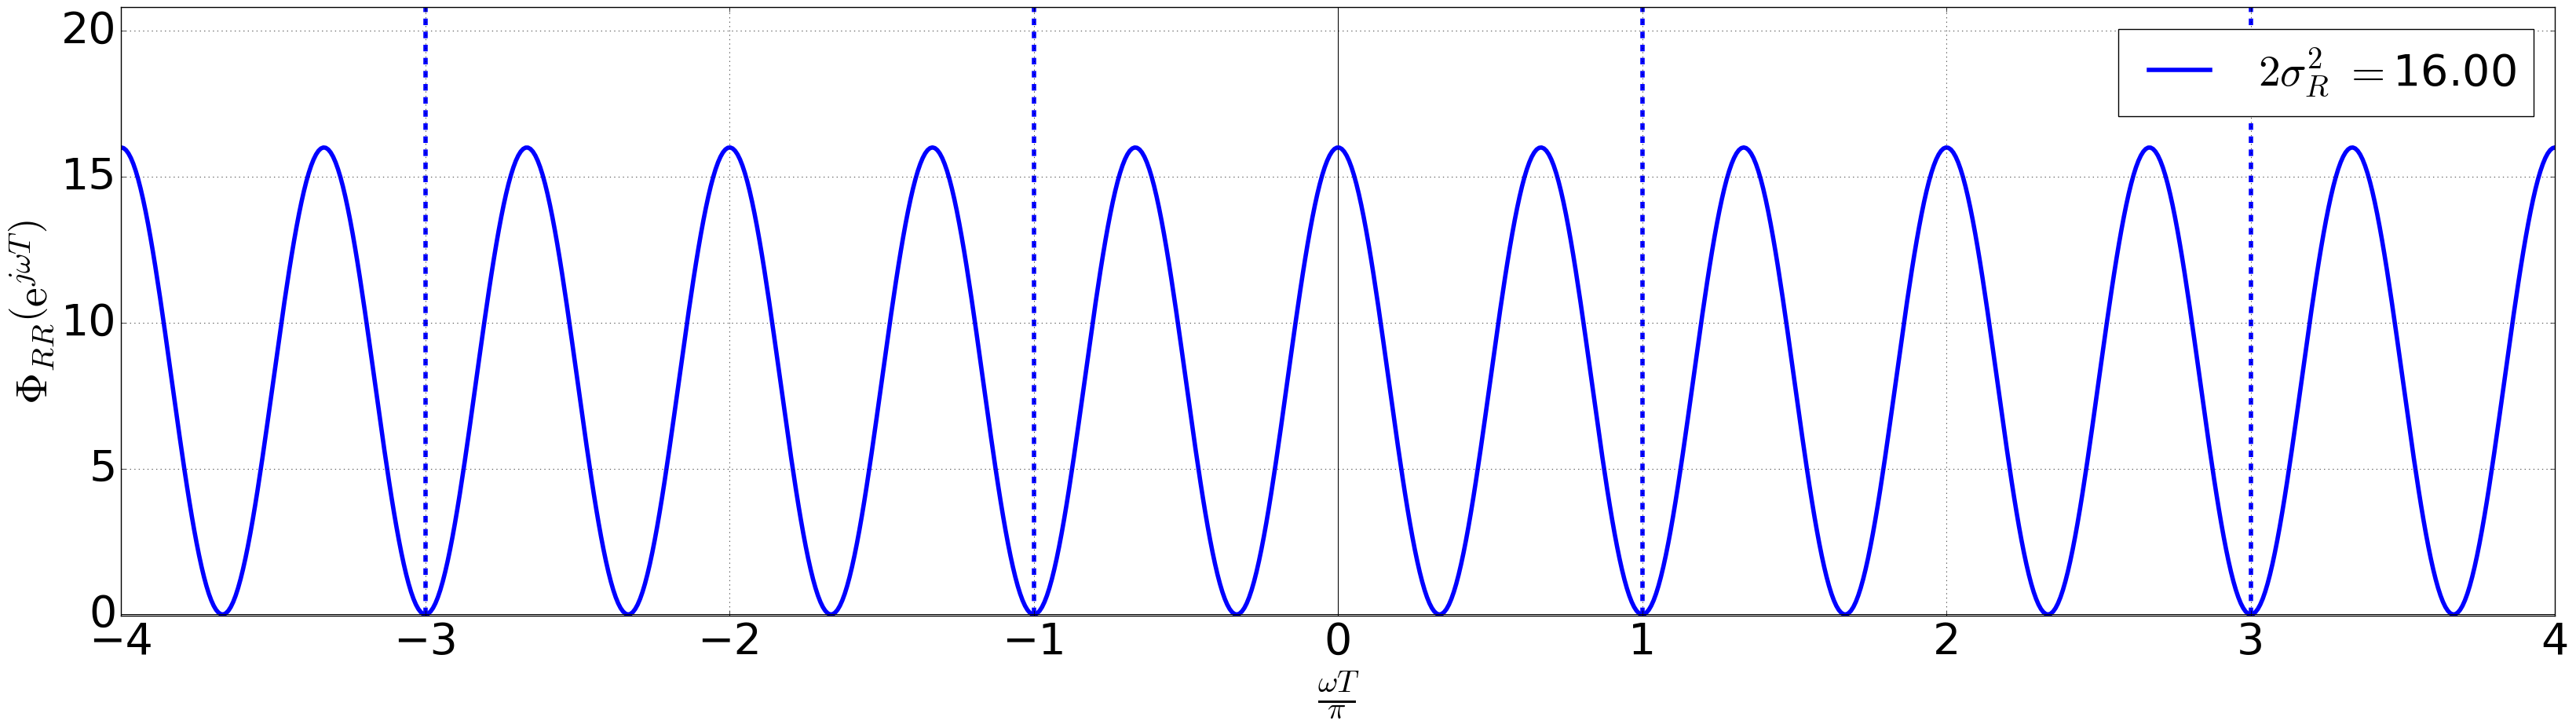

In [7]:
omega_T_per_pi = np.linspace(-4, 4, 1000)
Phi_RR = var_R*(1 + np.cos(3*pi*omega_T_per_pi))
omega_bounds = np.arange(-5, 5, 2)

plt.axvline(lw=0.75, c='k')
plt.plot(omega_T_per_pi, Phi_RR, lw=4, 
         label=r'$2\sigma_R^2 \ =$'+'{:2.2f}'.format(2*var_R))
plt.vlines(omega_bounds, 0 , 1.3*2*var_R, 'b', 'dashed', lw=4)
plt.axhline(lw=0.75, c='k')

plt.xlabel(r'$\frac{\omega T}{\pi}$')
plt.ylabel(r'$\Phi_{RR}\left( \mathrm{e}^{j\omega T} \right)$')
plt.xlim((-4, 4))
plt.ylim((-0.05, 1.3*2*var_R))
plt.legend(fontsize=40)
plt.grid(True);

## 13.5:
Bestimmen **und** skizzieren Sie die Kreuzkorrelationsfunktion (KKF) $\varphi_{RW}(\lambda)$ zwischen $R(n)$ und$W(n)$.

Die KKF $\varphi_{RW}(\lambda)$ lässt sich entweder mittels Erwartungswertbildung

\begin{align}
    \varphi_{RW}(\lambda) &= \mathrm{E}\left[ R(n) W(n+\lambda) \right] \\
    &= \mathrm{E}\left[ 2{\cdot}\left(W(n) + W(n-3)\right) W(n+\lambda) \right] \\
    &= 2{\cdot}\left( \mathrm{E}\left[W(n)W(n+\lambda)\right] + \underbrace{\mathrm{E}\left[W(n-3)W(n+\lambda)\right]}_{n'=n-3} \right) \\
    &= 2{\cdot}\left( \mathrm{E}\left[W(n)W(n+\lambda)\right] + \mathrm{E}\left[W(n')W(n'+3 + \lambda)\right] \right) \\
    &= 2{\cdot}\left( \varphi_{WW}(\lambda) + \varphi_{WW}(\lambda + 3) \right) \\
    &= 4\sigma_W^2\left( \gamma(\lambda) + \gamma(\lambda + 3) \right)
\end{align}

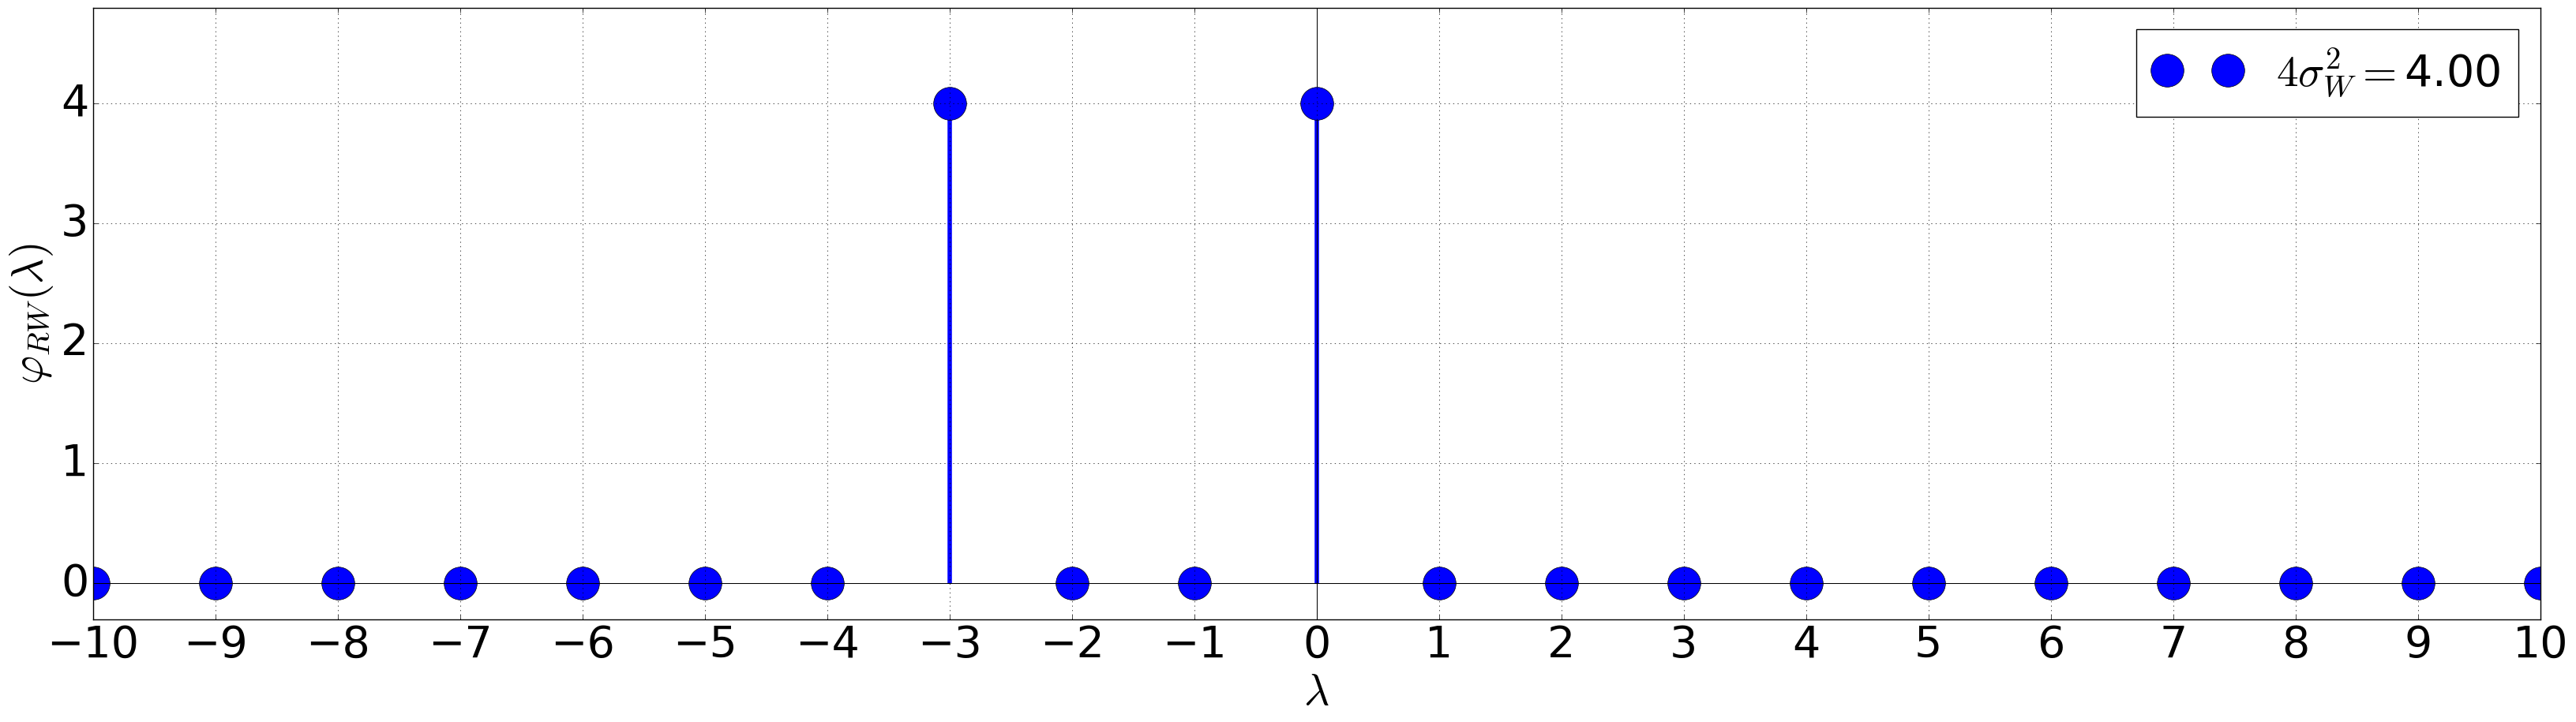

In [8]:
phi_RW = 4*var_W*((lambda_shift == 0) + (lambda_shift == -3))

plt.axvline(lw=0.75, c='k')
plt.plot(lambda_shift, phi_RW, 'bo', ms=30,
          label=r'$4 \sigma_W^2=$'+'{:2.2f}'.format(4*var_W))
plt.vlines(lambda_shift, 0, phi_RW, 'b',lw=4)
plt.axhline(lw=0.75, c='k')

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\varphi_{RW}(\lambda)$')
plt.xticks(lambda_shift)
plt.xlim((-10, 10))
plt.ylim((-0.3, 1.2*4*var_W))
plt.legend(fontsize=40)
plt.grid(True);

## 13.6:
Zum Zeitpunkt $n'$ konnte zufälligerweise der Messwert $W(n')=4.5$ beobachtet werden. Geben sie die Wahrscheinlichkeitsdichte $p_{R|W}(r|w=W(n')=4.5)$ an.

Das Signal werde nun auf folgenden Amplitudenquantisierer gegeben:
    
\begin{align}
    R_q(n) = \begin{cases} 
                 4:& R(n) > 4 \\
                 2:& 0 \leq R(n) \leq 4 \\
                 -2:& -4 \leq R(n) \leq 0 \\
                 -4:& R(n) < -4
             \end{cases}
\end{align}

## 13.7:
Geben sie die Verteilungdichte $p_{R_q}(r_i)$ von $R_q(n)$ an.

Die Wahrscheinlichkeitsdichte einer kontinuierlichen Zufallsvariablen ist eine Summe von $Dirac-Impulsen$, die jeweils mit dem Wert der Wahrscheinlichkeitsmassefunktion an dieser Stelle gewichtet sind:

\begin{align}
    p_{R_q}(r) = \sum_{r_i \in \{{-}4, {-}2, 2, 4\} } \mathrm{Pr}_{R_q}(r_i)\ \delta(r - r_i)
\end{align}

Durch die Quantisierung werden alle Werte in den gegebenen Intervallen auf den angegebenen Wert gemappt. Das bedeutet, dass sich jeweils die gesamte Wahrscheinlichkeitsmasse zwischen im Intervall $[r_{i,l}, r_{i,u}]$ auf den angegebenen Wert $r_i$ konzentriert:

\begin{align}
    \mathrm{Pr}_{R_q}(r_i) = \mathrm{Pr}(R_q(n) = r_i) = \int_{r_{i,l}}^{r_{i,u}} p_R(r) \mathrm{d}r
\end{align}

Wegen der Symmetrie der Normalverteilung $p_R(r) = \mathcal{N}(r; 0, 8)$ reicht es aus, den Wert für $R_q(n) = 4$ zu bestimmen:

\begin{align}
    \mathrm{Pr}_{R_q}(4) = \mathrm{Pr}(R_q(n) = 4) &= \int_{4}^{\infty} p_R(r) \mathrm{d}r = \int_{4}^{\infty} \mathcal{N}(r; 0, 8)\ \mathrm{d}r
\end{align}

Aus der Vorlesung ist bekannt, dass sich das Integral über eine Standardnormalverteilung durch die Q-Funktion darstellen lässt:

\begin{align}
    Q(a) = \mathrm{Pr}(z > a) = \int_{a}^{\infty} \mathcal{N}(r; 0, 1)\ \mathrm{d}r
\end{align}

Dazu muss $R(n)$ auf eine standardnormalverteilte Zufallsvariable transformiert werden.
Im allgemeinen geht das so: Wenn $p_X(x) = \mathcal{N}(x; \mu_X, \sigma_X^2)$, dann hat $Z=\frac{X -\mu_X}{\sigma_X}$ die Verteilung $\mathcal{N}(x; 0, 1)$, ist also standardnormalverteilt:

\begin{align}
    \mu_Z &= \mathrm{E}\left[ \frac{X -\mu_X}{\sigma_X} \right] = \frac{\mathrm{E}\left[X\right] -\mu_X}{\sigma_X} = 0 \\
    \sigma_Z^2 &= \mathrm{E}\left[ Z^2 \right] = \mathrm{E}\left[ \left(\frac{X -\mu_X}{\sigma_X}\right)^2 \right] =
     \frac{\mathrm{E}\left[(X -\mu_X)^2 \right]}{\sigma_X^2} = 1.
\end{align}
    
Es muss aber darauf geachtet werden, die Grenzen zu substituieren:

\begin{align}
    \mathrm{Pr}_{R_q}(4) &= \int_{4}^{\infty} \mathcal{N}(r; 0, 8)\ \mathrm{d}r = \int_{\frac{4}{\sigma_R} }^{\infty} \mathcal{N}(z; 0, 1)\ \mathrm{d}z = \mathrm{Q}\left( \frac{4}{\sigma_R} \right) =  \mathrm{Q}\left( \frac{4}{\sqrt{8}} \right) =  \mathrm{Q}\left(\sqrt{2}\right) \approx 0.0786
\end{align}

In [9]:
def qfunc(x):
    return 1/2*erfc(x/np.sqrt(2))

print('Pr(r > 4) = Q(1/sqrt(2))= {:1.4f}'.format(qfunc(np.sqrt(2))))
print('Pr(0 <= r <= 4) = Q(1/sqrt(2))= {:1.4f}'.format(0.5 - qfunc(np.sqrt(2))))

Pr(r > 4) = Q(1/sqrt(2))= 0.0786
Pr(0 <= r <= 4) = Q(1/sqrt(2))= 0.4214


Die restlichen Werte lassen sich durch Symmetrie berechnen:

\begin{align}
    \mathrm{Pr}_{R_q}(-4) &= \mathrm{Q}\left( \sqrt{2} \right) \approx 0.0786 \\
    \mathrm{Pr}_{R_q}(2) = \mathrm{Pr}_{R_q}(-2) &= \frac{1}{2} - \mathrm{Q}\left( \sqrt{2} \right) \approx 0.4214
\end{align}

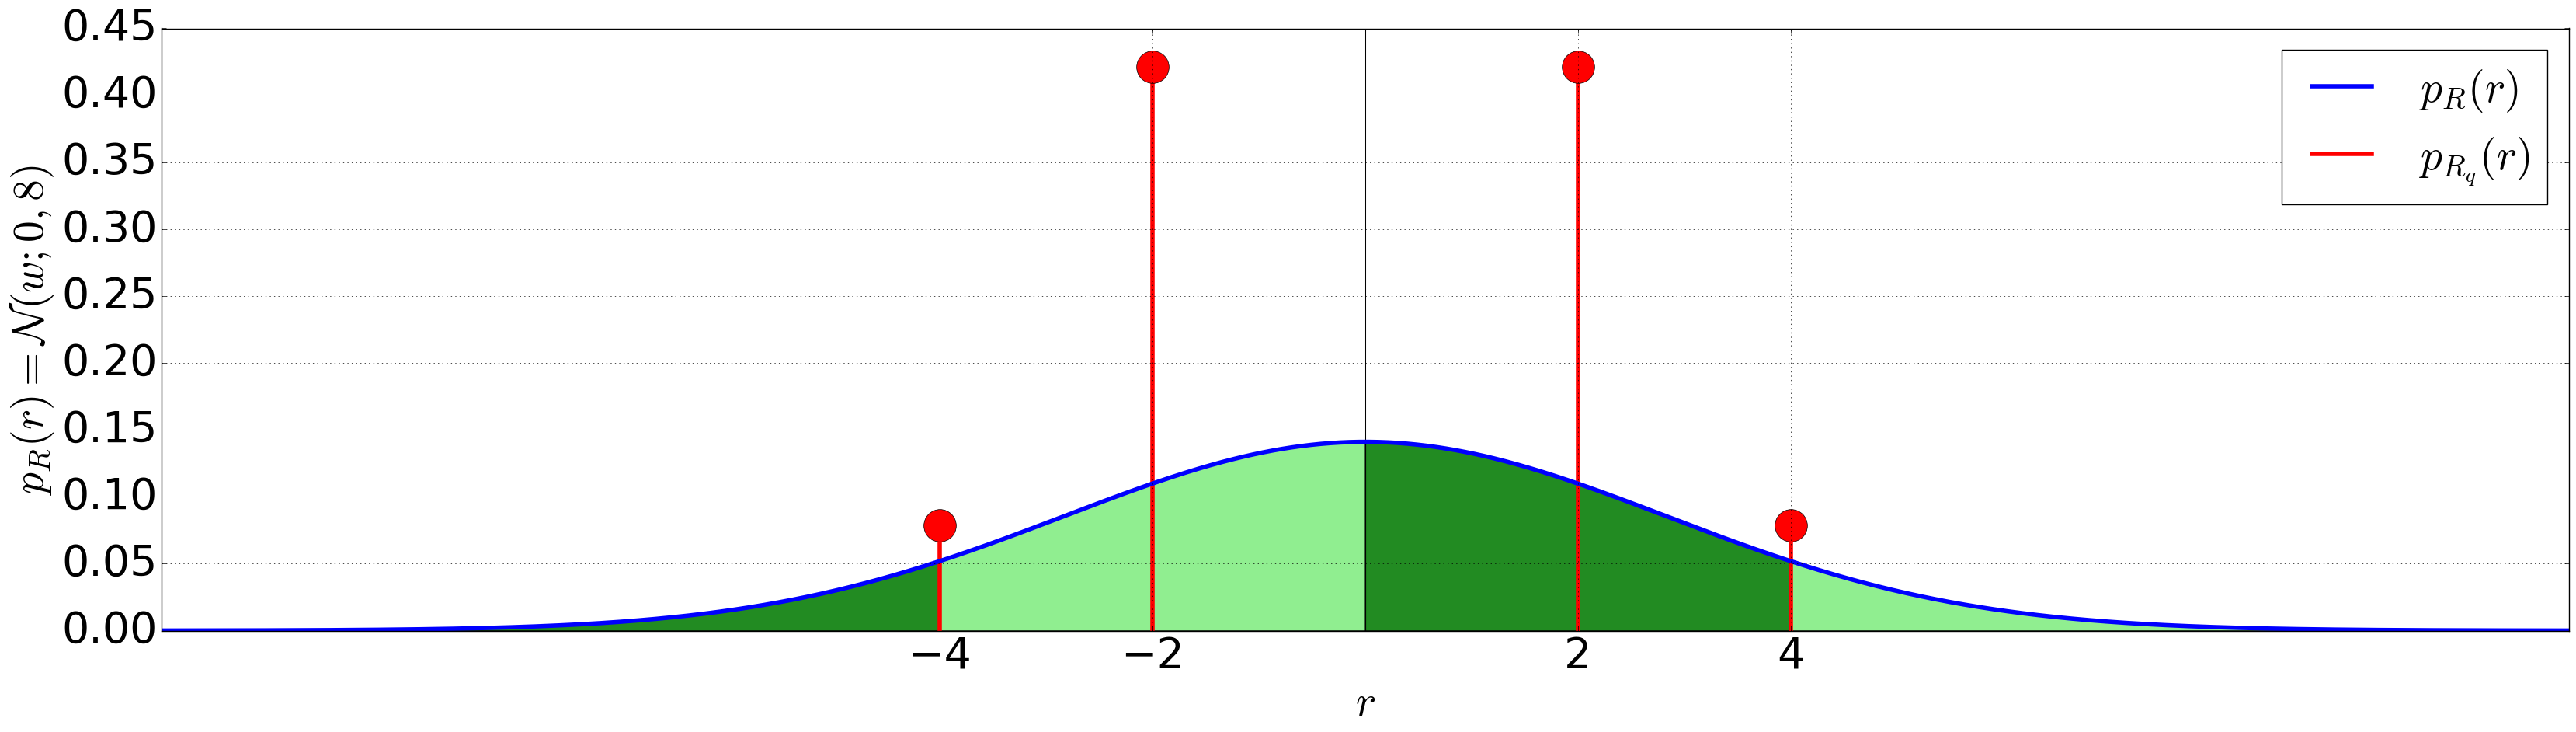

In [10]:
plt.axvline(lw=0.75, c='k')
# Zeichne Wsk-Dichte der kontinuierlichen Variable
plt.plot(r, p_R.pdf(r), lw=4, label=r'$p_R(r)$')

# Zeichne Intervall-Wahrscheinlichkeiten als Flaechen
bounds = [min(r), -4, 0, 4, max(r)]
col_set = ['forestgreen', 'lightgreen']
for i in range(4):
    r_i = np.linspace(bounds[i], bounds[i+1], 500)
    plt.fill_between(r_i, 0, p_R.pdf(r_i),
                     facecolor=col_set[i % 2], interpolate=True)

# Zeichne Wsk-Dichte der quantisierten Variable
r_q = np.array([-4, -2, 2, 4])
Pr_R_q = np.array([qfunc(np.sqrt(2)), 0.5-qfunc(np.sqrt(2)), 
                   0.5-qfunc(np.sqrt(2)), qfunc(np.sqrt(2))])
plt.plot(r_q, Pr_R_q, 'ro', ms=30)
plt.vlines(r_q, 0, Pr_R_q, 'r', lw=4, label=r'$p_{R_q}(r)$')

plt.axhline(lw=0.75, c='k')
plt.xlim((min(r), max(r)))
plt.ylim((0, 0.45))
plt.xticks(r_q)
plt.xlabel(r'$r$')
plt.ylabel(r'$p_R(r) = \mathcal{N}(w; 0, 8)$')
plt.grid(True)
plt.legend(fontsize=40);

## 13.8:
Wie groß ist die Wahrscheinlichkeit, dass $R_q(n) = 4$ ist?

Diese Frage wurde bereits in der vorhergehenden Teilaufgabe beantwortet:

\begin{align}
 \mathrm{Pr}(R_q=4) = \mathrm{Pr}_{R_q}(4) = \mathrm{Q}\left(\sqrt{2}\right) \approx 0.0786
\end{align}